# Titanic Data - Machine Learning

라이브러리 불러오기

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd

In [83]:
# graph size 조정
sns.set(rc={'figure.figsize':(15, 5)})
plt.style.use('fivethirtyeight')

In [173]:
import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

data set

In [174]:
train_df = pd.read_csv('/Users/gwangyongkim/Documents/kaggle/titanic/train.csv')
test_df = pd.read_csv('/Users/gwangyongkim/Documents/kaggle/titanic/test.csv')

In [175]:
# 모델 적용의 일관성을 위해, train과 test를 합한 combine data set도 지정
combine=[train_df,test_df]

In [176]:
# train data의 변수 확인
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### train data 미리보기

In [177]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### test data 미리보기

In [178]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## survival : 0=no, 1=yes
전체 생존자와 사망자는 얼마나 될 것인가?

Text(0.5, 1.0, 'survived')

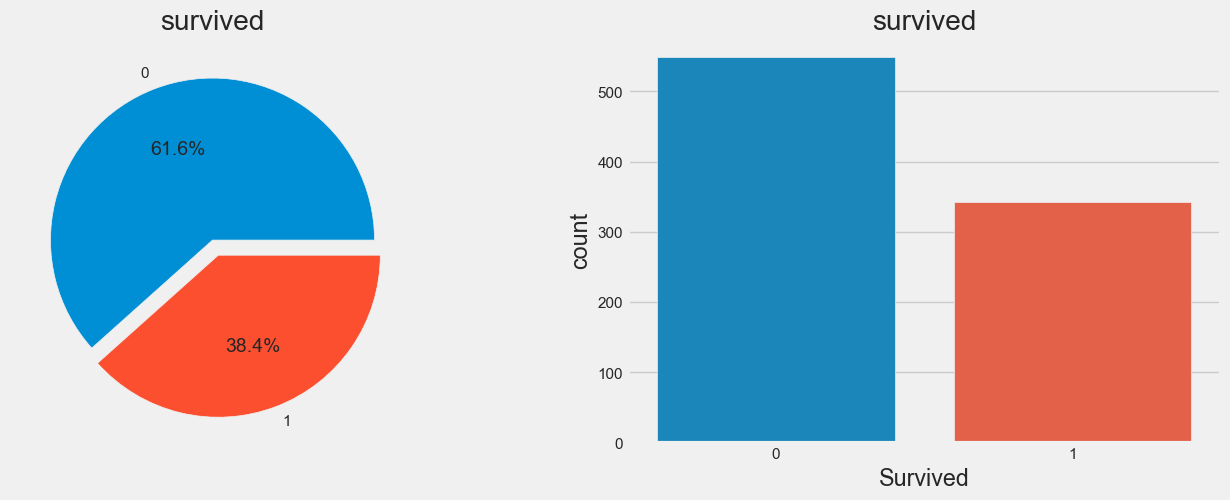

In [179]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=None)
# explode : 파이 조각이 돌출되는 크기(0이면 돌출x) - 2번째 파이조각을 돌출
# autopct : 파이 조각의 전체 대비 백분율 - 소수점 1자리까지 %로 표기
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train_df,ax=ax[1])
ax[1].set_title('survived')

### groupby로 성별 생존자, 사망자 수 확인 -> survival : 0=no, 1=yes

In [180]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived vs Dead')

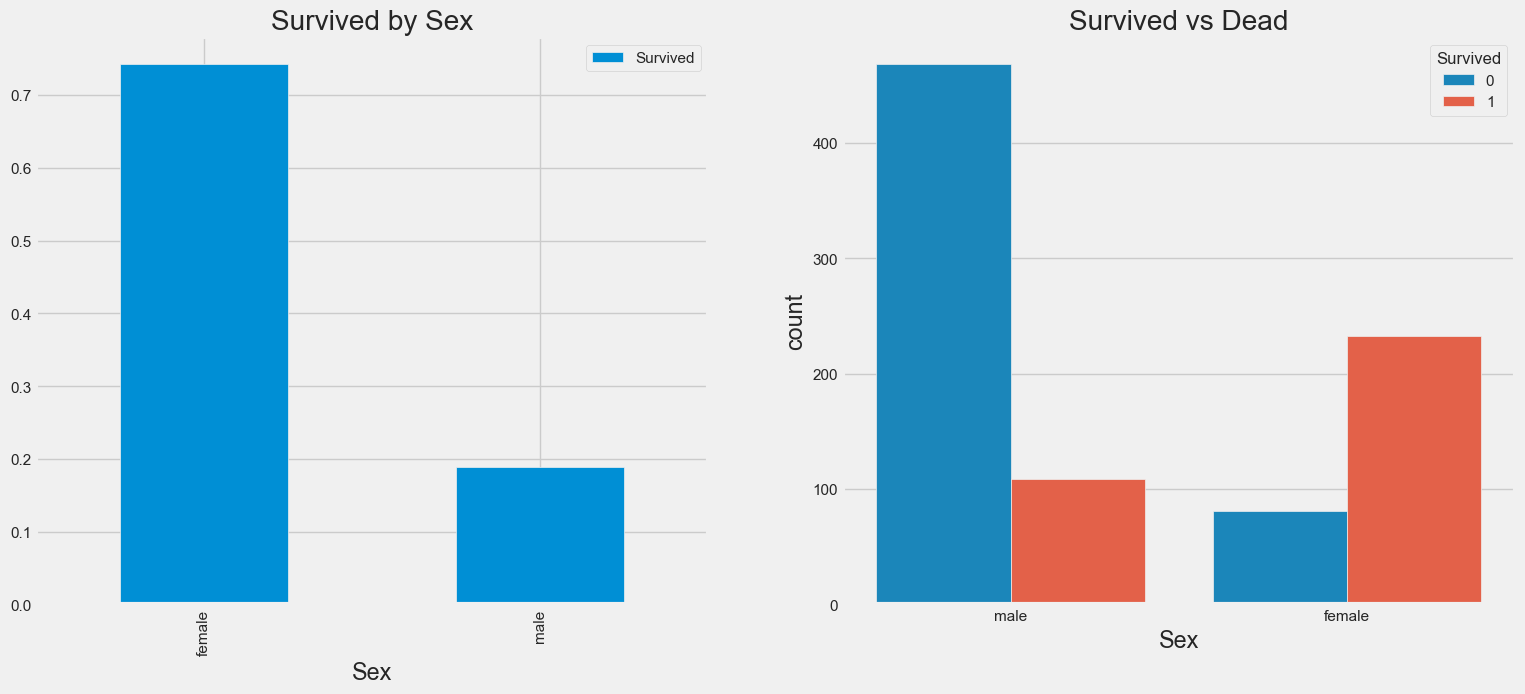

In [181]:
fig, ax = plt.subplots(1, 2, figsize=(17,7))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived by Sex')
sns.countplot('Sex', hue='Survived', data=train_df, ax=ax[1])

ax[1].set_title('Survived vs Dead')

In [182]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


여성일수록 생존(Survived=1) 확률이 높아보인다. 생존자 예측시 중요한 변수 중 하나.

groupby로 Pclass별 생존자, 사망자 수 확인 -> survival : 0=no, 1=yes

In [183]:
train_df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived vs Dead by Pclass')

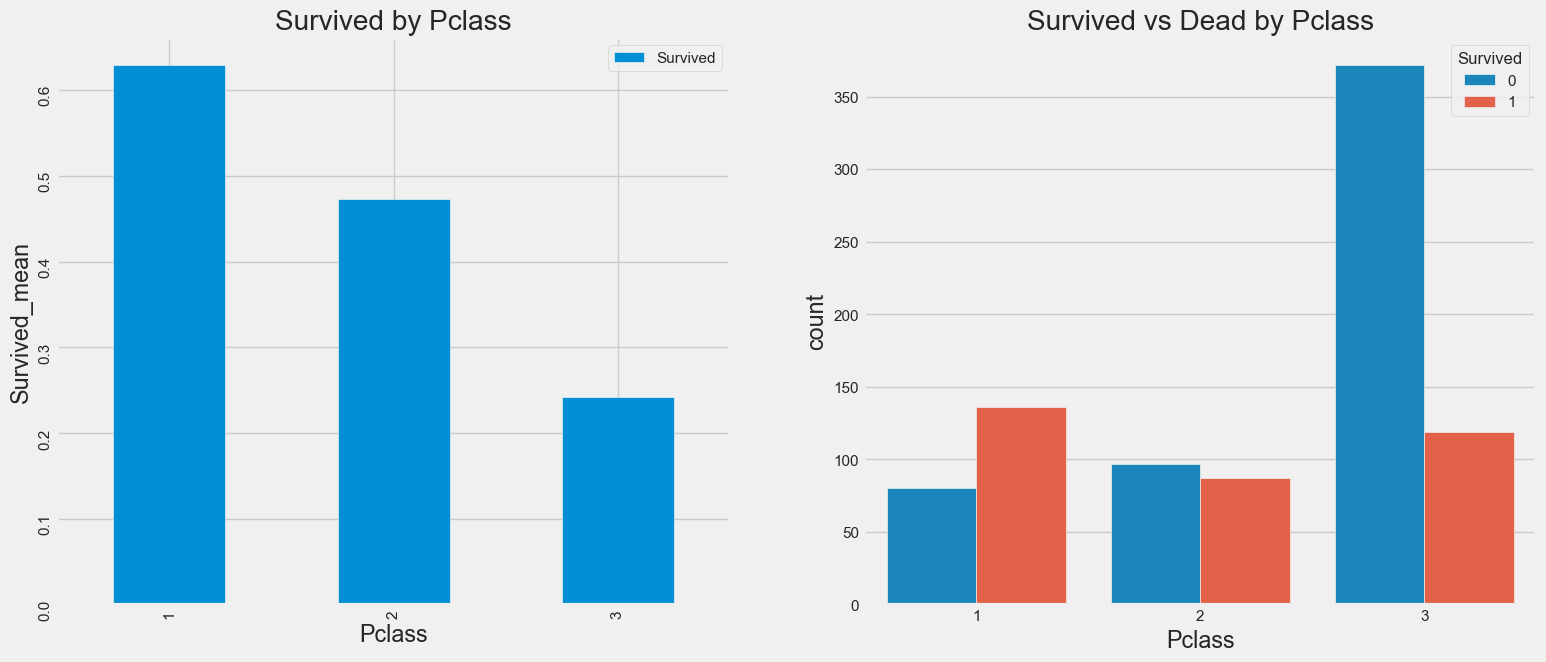

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(17,7))
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Survived_mean')

ax[0].tick_params(labelrotation=90)
# 아래와 같이도 가능
# train_df['Pclass'].value_counts().plot.bar(ax=ax[0])

ax[0].set_title('Survived by Pclass')


sns.countplot('Pclass', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived vs Dead by Pclass')

Pclass(객실 클래스)가 높을수록 생존(Survived=1) 확률이 높아보인다.

### crosstab으로 변수 케이스 별 value_count


Pclass별 평균 생존 확률을 알아보자

In [185]:
pd.crosstab(train_df.Pclass,train_df.Survived,margins=False).style.background_gradient(cmap='summer_r')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [186]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Pclass가 높을 수록 생존 확률이 높아보인다

성별(Sex), 객실 클래스(Pclass)별 생존자 수 확인

In [187]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [188]:
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins=False).style.background_gradient(cmap='summer_r')

여성이면서 객실 클래스가 높을 수록(Pclass=1) 생존자가 많다.
 남성이면서 객실 클래스가 낮을 수록(Pclass=3) 사망자가 많다. 남성의 경우 Pclass 가 높을수록 생존자가 높다고 할 수는 없겠다.

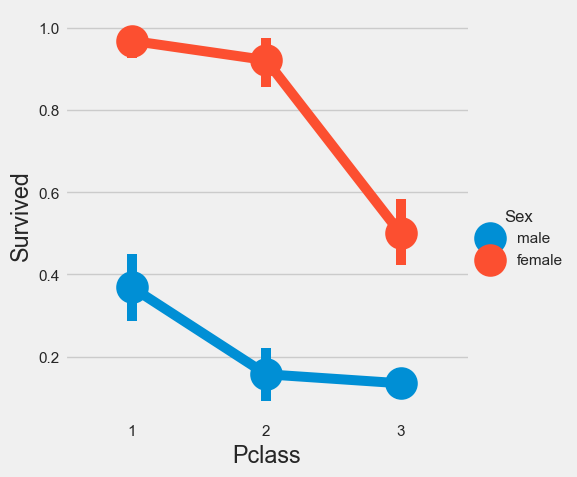

In [189]:
# factorplot, 카테고리컬 변수에 따른 시각화, y축은 평균값을 나타냄.
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_df)

Pclass1에 관계없이 남성 보다는 여성의 생존률이 더 높아보임(먼저 구조되었다고 보여짐)

### 성별(Sex), 객실 클래스(Pclass)별 평균 생존 확률

In [100]:
train_df[['Sex','Pclass','Survived']].groupby(['Sex', 'Pclass']).mean()

# 아래와 같이 해도 됨
# train_df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### 승객의 최대, 최소, 평균 나이

In [101]:
print('Oldereest Passenger was of : ', train_df['Age'].max(), 'Years')
print('Younged Passenger was of : ', train_df['Age'].min(), 'Years')
print('Average Passenger was of : ', train_df['Age'].mean(), 'Years')

Oldereest Passenger was of :  80.0 Years
Younged Passenger was of :  0.42 Years
Average Passenger was of :  29.69911764705882 Years


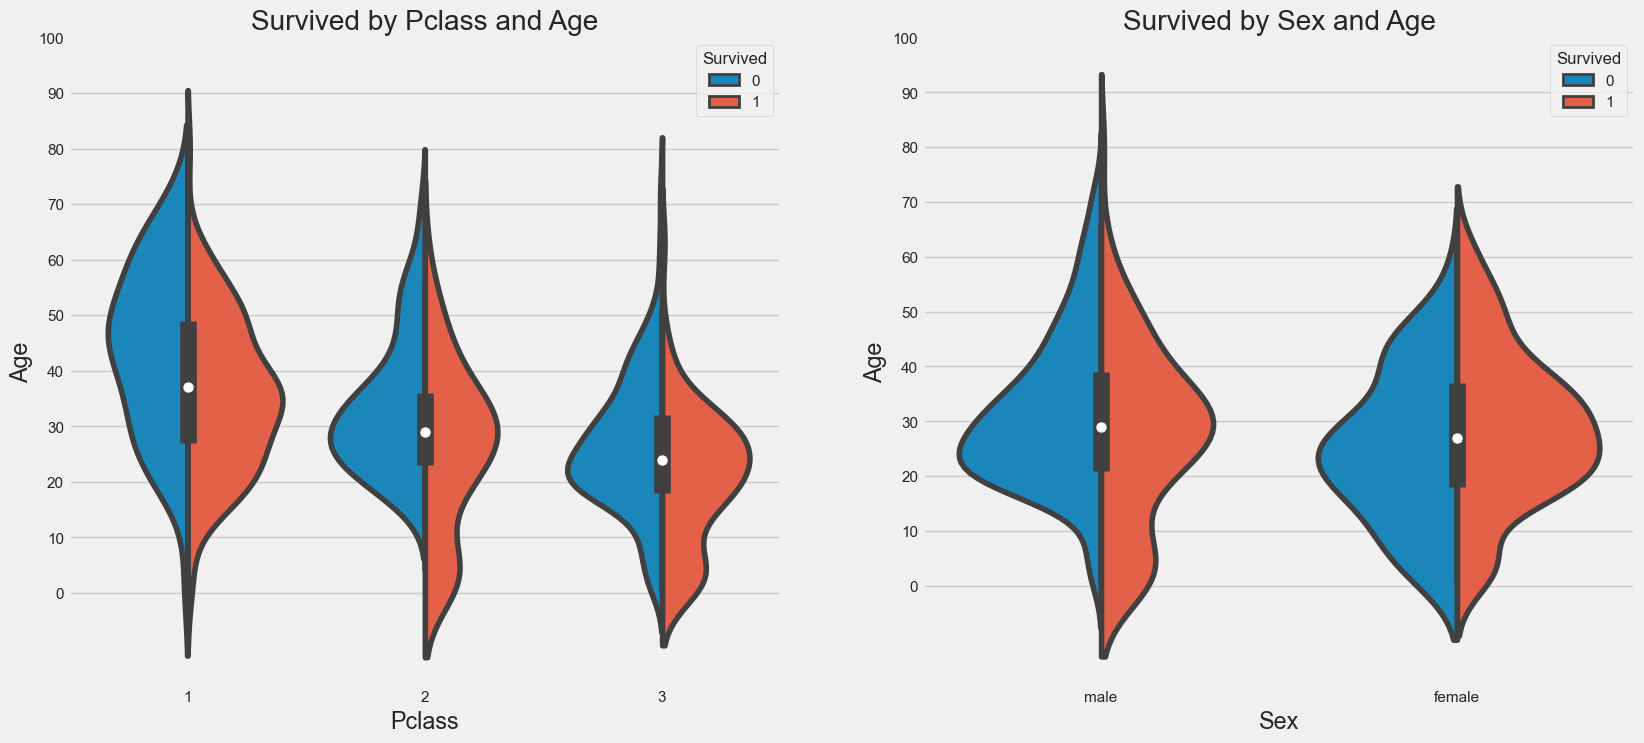

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# violinplot 시각화, 대칭성을 이용하여 한쪽만 남기고 split=True로 합침
# 첫 번째 그래프는 Pclasee에 따른 Age의 생존여부 시각화
sns.violinplot('Pclass', 'Age', hue='Survived', data=train_df, split=True, ax=ax[0])
ax[0].set_title('Survived by Pclass and Age')
# yticks로 그래프의 눈금 최소, 최대, 단위 설정
ax[0].set_yticks(range(0,110,10))

# 두 번째 그래프는 Sex(성별)에 따른 Age의 생존여부 시각화
sns.violinplot('Sex', 'Age', hue='Survived', data=train_df, split=True, ax=ax[1])
ax[1].set_title('Survived by Sex and Age')
ax[1].set_yticks(range(0, 110, 10))

사망자의 나이대를 보면 20~30대가 가장 많다. (그래프가 가장 도드라짐)

In [193]:
# 이름중에 Mr, Mrs들어가는 사람의 나이중 결측값에 평균을 대입
train_df['Initial'] = 0
for i in train_df:
    train_df['Initial']=train_df.Name.str.extract('([A-Za-z]+)\.')
    #위 extraxt의 의미는 A-Z와 a-z의 문자중 다음 문자로 .이 따라오는 것을 추출

In [194]:
pd.crosstab(train_df.Initial, train_df.Sex, margins=True).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


Mlle 또는 Mme와 같이 Miss를 나타내는 잘못된 이니셜이 있음. 오타라고 생각되는 이니셜들을 수정 (replace 사용)

In [195]:
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

그 후에 이니셜별 나이의 평균을 구해서 이니셜을 가진 승객의 나이가 결측치라면, 구한 평균값을 넣어줌

In [196]:
train_df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

아래와 같이 이니셜별로 평균 나이를 넣어준다

In [197]:
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Other'),'Age']=46

In [198]:
train_df.Age.isnull().any() # NuLL값이 있는지 확인

False

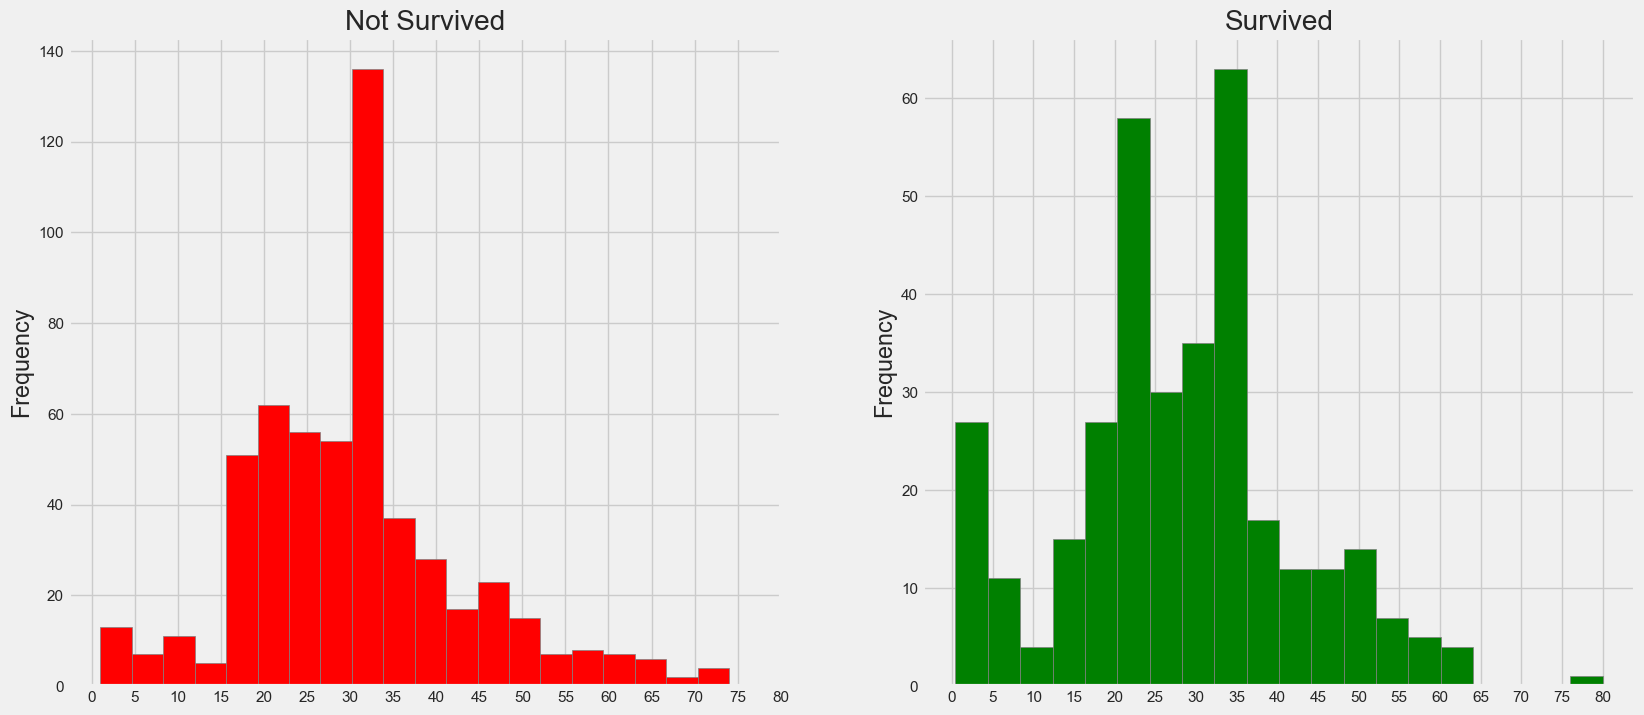

In [199]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

train_df[train_df.Survived == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='gray', color='red')
ax[0].set_title('Not Survived')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
train_df[train_df.Survived==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='gray')
ax[1].set_title('Survived')
ax[1].set_xticks(range(0, 85, 5))

사망자는 30부터 35세가 가장 많고, 생존자는 5세 미만의 어린이와 20부터 25세, 35세 내외가 많다. 80대 노인도 일부 생존

### Initial 별 생존율 확인

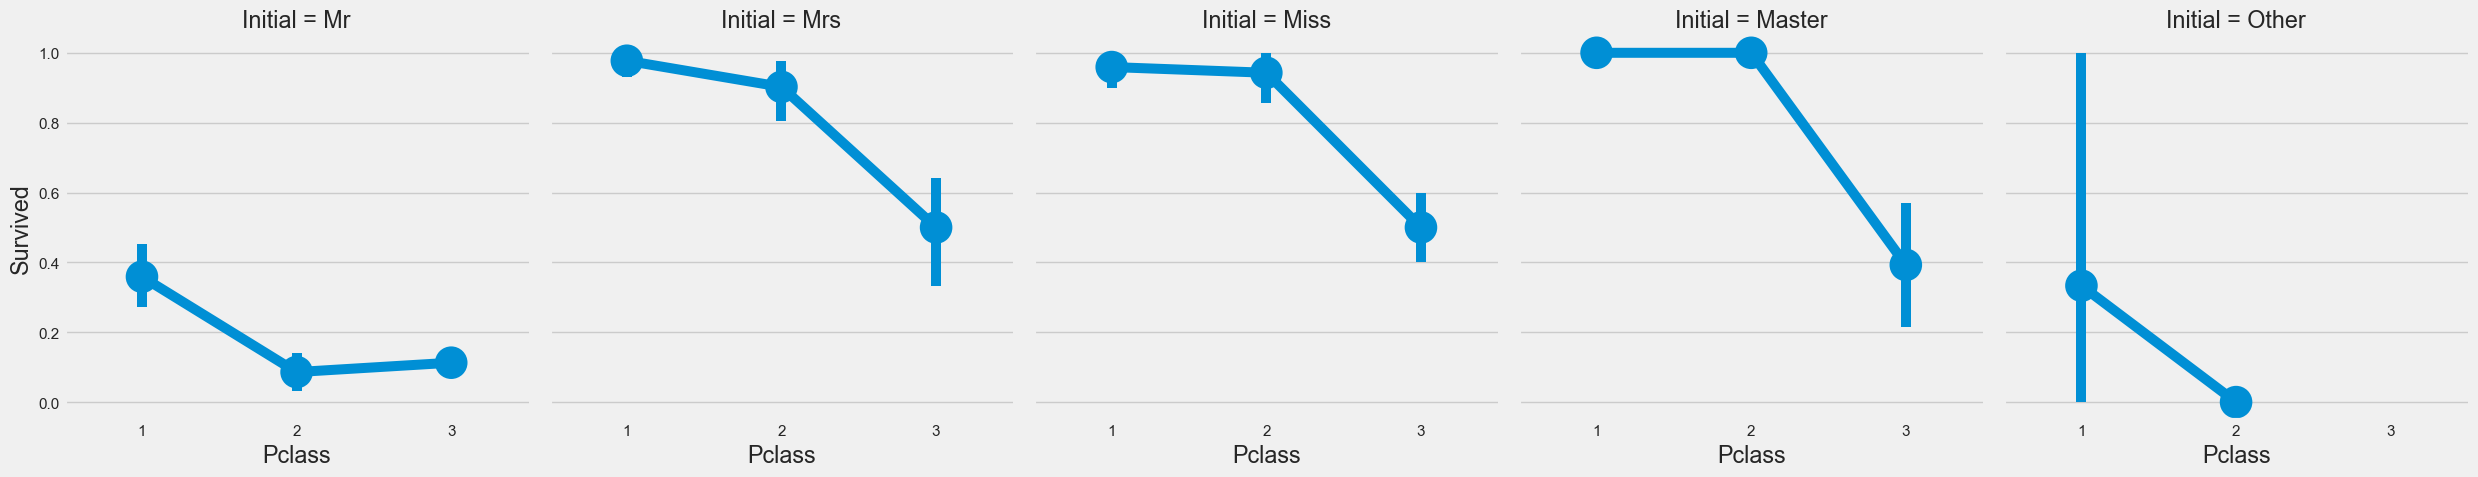

In [200]:
# factorplot, 카테고리컬 변수에 따른 시각화, y축은 평균값을 나타냄.

sns.factorplot('Pclass', 'Survived', col='Initial', data=train_df)

### Embarked Analysis (Embarked : 승객이 승선한 항구이름)

crosstab으로 변수 케이스 별 value_count

In [201]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')

Embarked의 S항구의 탑승자가 가장 많으며, 동시에 S항구 탑승자의 남성의 사망이 가장 많은 것으로 보여짐 (여성중에서도 S 항구 탑승자의 사망자가 가장 많은 것으로 보여진다)

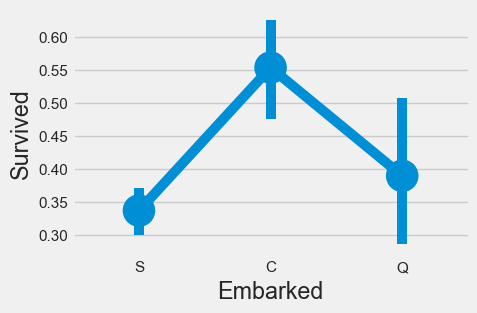

In [202]:
# factorplot, 카테고리컬 변수에 따른 시각화, y축은 평균값을 나타냄.
sns.factorplot('Embarked', 'Survived', data=train_df)
fig=plt.gcf()
fig.set_size_inches(5, 3)

# figure에 접근해야할 땐, plt.gcf()

factorplot으로 확인한 결과 S 항구 승객의 생존율이 가장 낮음

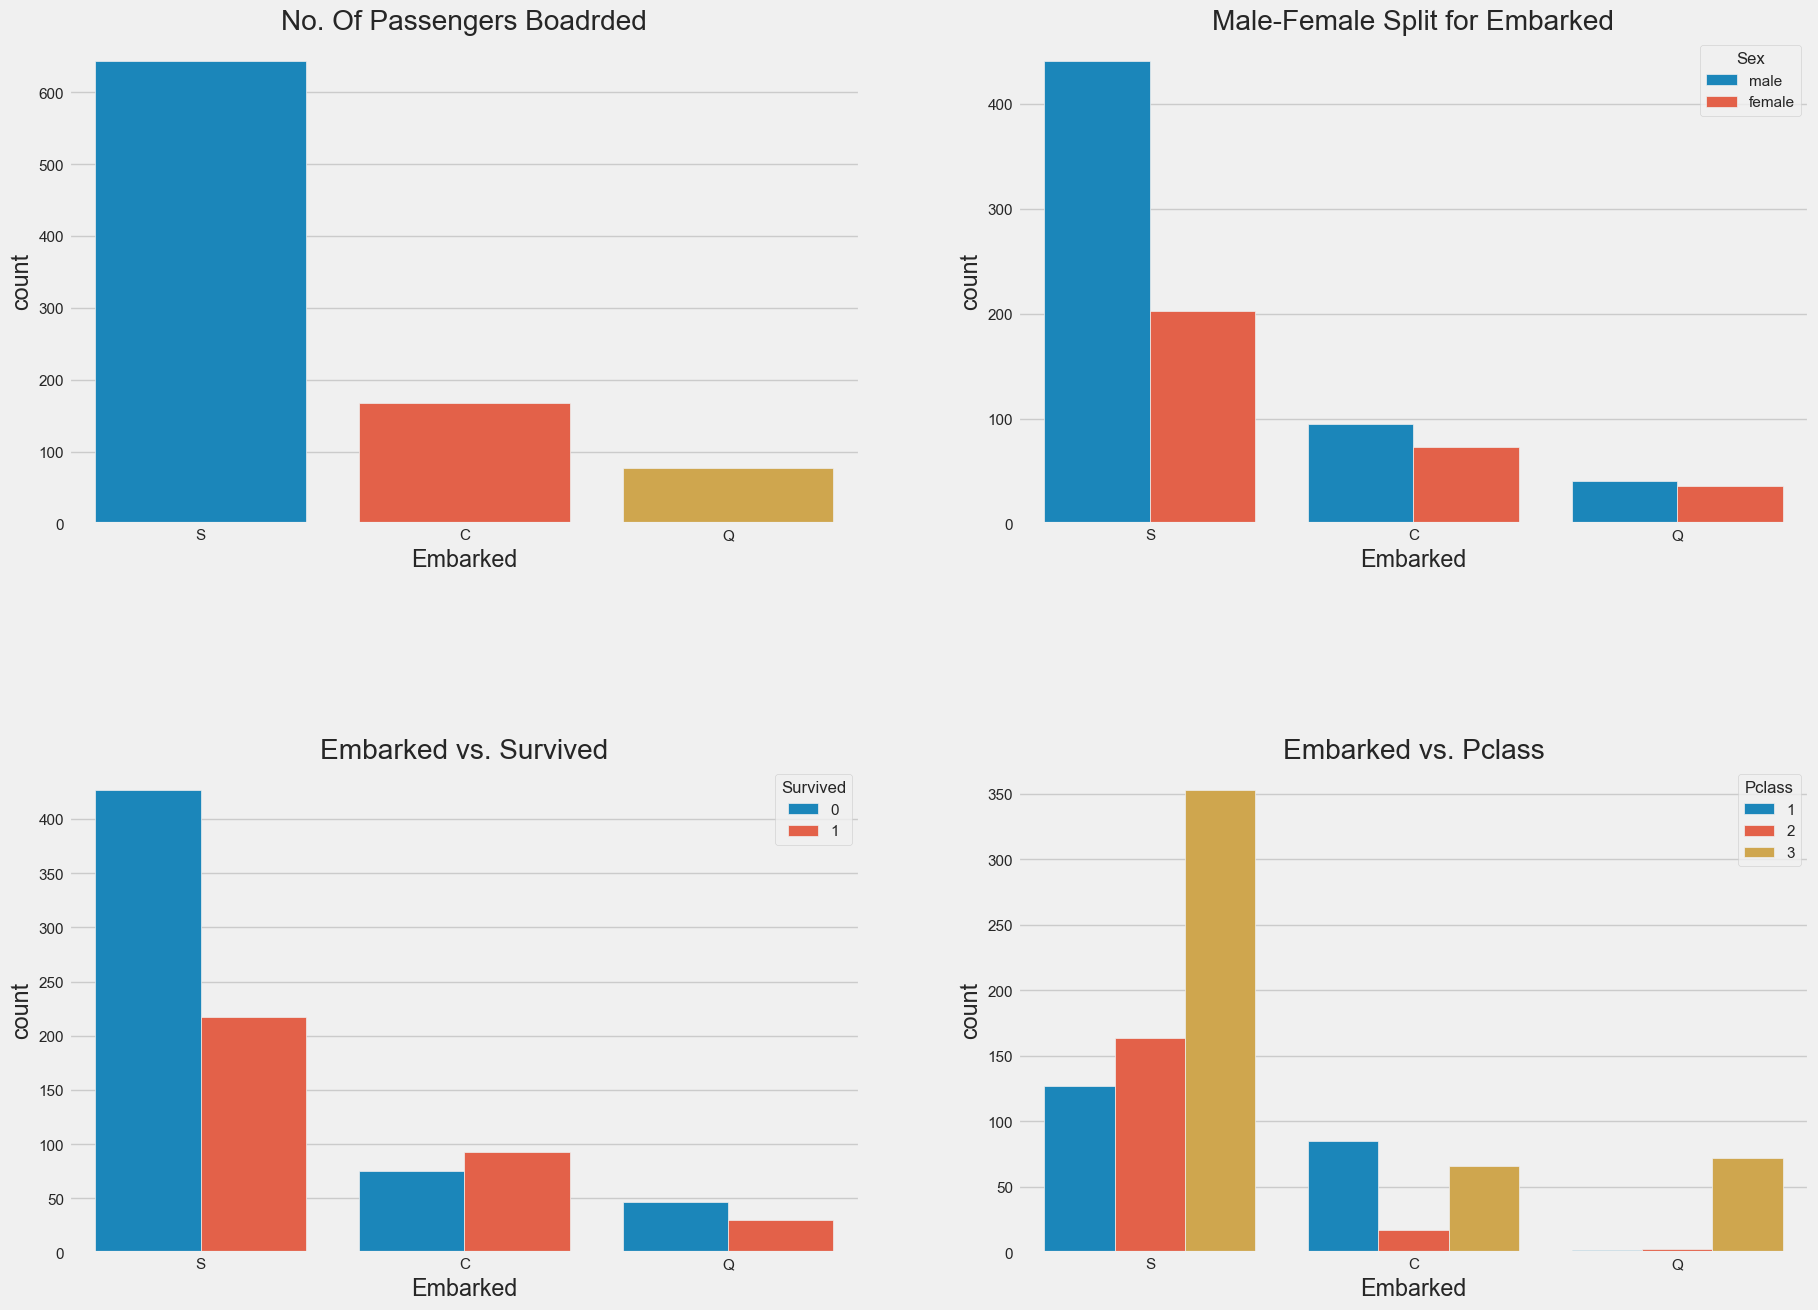

In [203]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=train_df, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boadrded')

sns.countplot('Embarked', hue='Sex', data=train_df, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=train_df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=train_df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs. Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [204]:
train_df.groupby(['Embarked', 'Pclass'])['Survived'].mean()

Embarked  Pclass
C         1         0.694118
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.582677
          2         0.463415
          3         0.189802
Name: Survived, dtype: float64

Embarked S의 생존율이 낮은 이유는 Pclass3 의 대략 81% 사람이 사망했기 때문

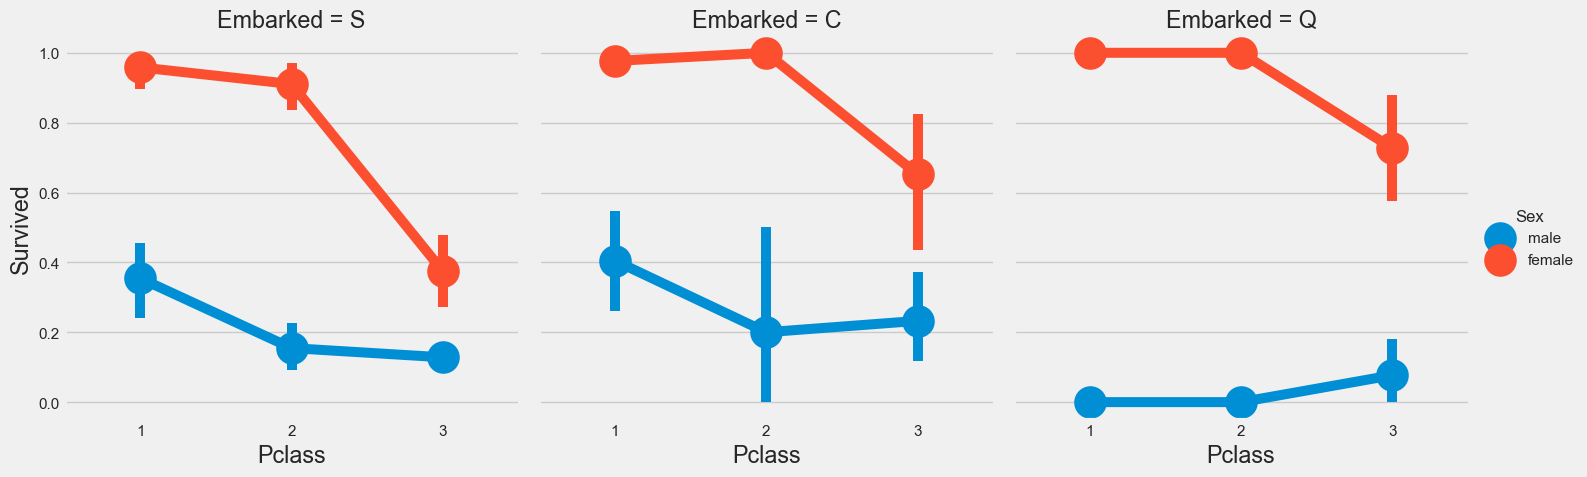

In [205]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train_df)

Embarked의 결측치는 최빈값(S)으로 채워준다.

In [206]:
# NULL value of Embakred
# Maximum passenger boarded from pors S, so replace Null with 'S'
train_df['Embarked'].fillna('S', inplace=True)

In [207]:
# 결측값이 있는지 확인
train_df.Embarked.isna().any()

False

### SibSp Analysis

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

In [208]:
pd.crosstab(train_df.SibSp, train_df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


Text(0.5, 1.0, 'SibSp vs Survived')

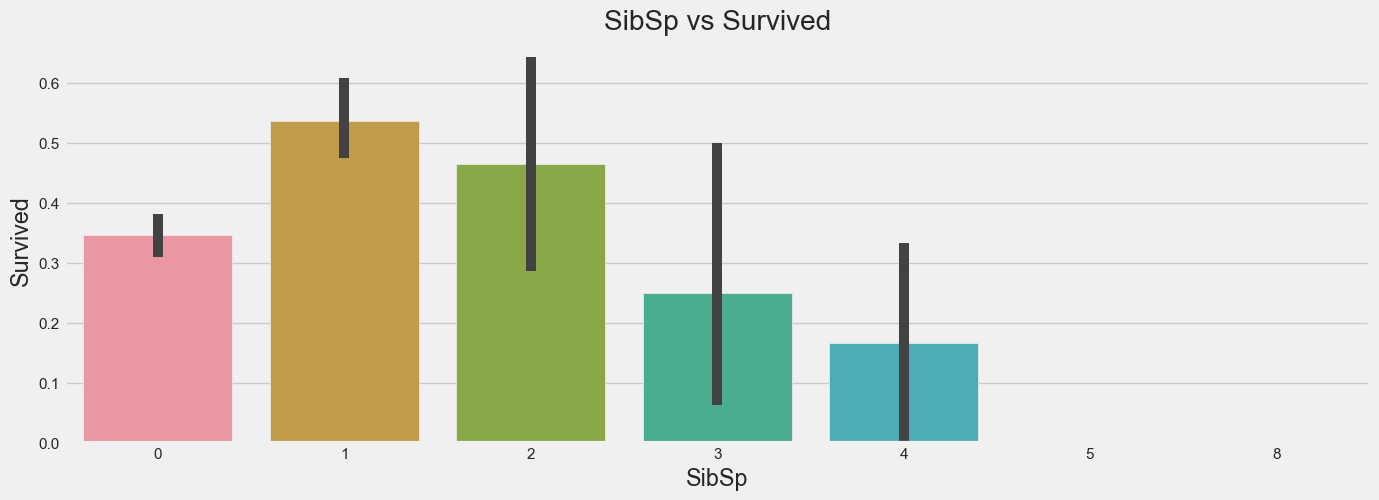

In [209]:
sns.barplot('SibSp', 'Survived', data=train_df).set_title('SibSp vs Survived')

# barplot에서 가는선은 추정치 (신뢰구간과 유사)
# 이 범위는 기본적으로 부트 스트랩 신뢰구간이라는 것을 사용
# 이 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것이라는 의미
# 신뢰구간이 아니라 표준편차를 표현하고 싶으면 파라미터로 ci="sd" 저장

SibSp 데이터 분석해보니 1, 2에 해당하는 승객의 생존율은 높은 편이지만, 혼자이거나 3 이상은 낮아짐

Text(0.5, 0.98, 'SibSp vs Survived')

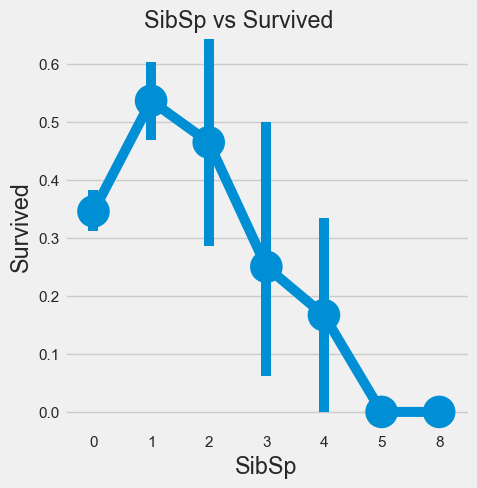

In [210]:
factor = sns.factorplot('SibSp', 'Survived', data=train_df, ax=ax[1])
factor.fig.suptitle('SibSp vs Survived')

In [211]:
pd.crosstab(train_df.SibSp, train_df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch Analysis

Parch : 동반한 Parent(부모) Child(자식)의 수

In [212]:
pd.crosstab(train_df.Parch, train_df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [213]:
pd.crosstab(train_df.Parch, train_df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Parch vs Survived')

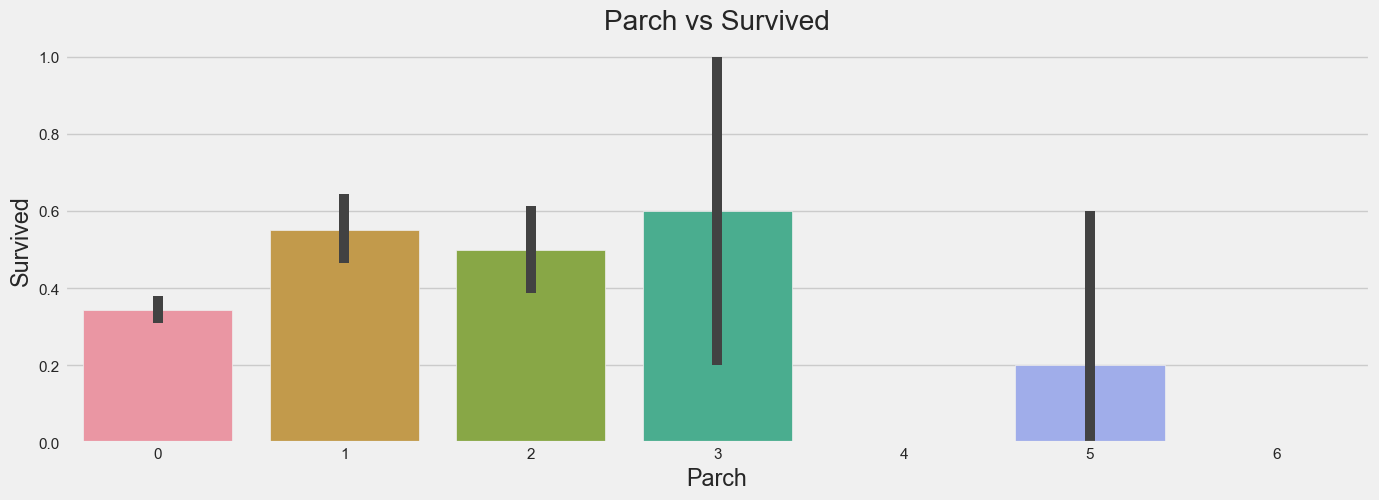

In [214]:
sns.barplot('Parch', 'Survived', data=train_df).set_title('Parch vs Survived')

Text(0.5, 0.98, 'Parch vs Survived')

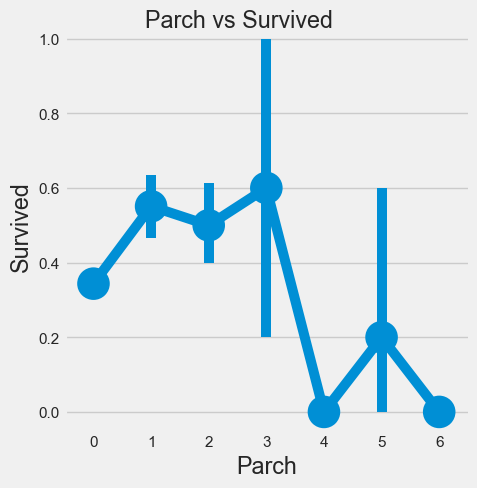

In [215]:
fac = sns.factorplot('Parch', 'Survived', data=train_df)
fac.fig.suptitle('Parch vs Survived')

Parch데이터는 1 ~ 3에 해당하는 승객은 생존율이 높고, 나머지는 낮다.

### Fare(continous) Analysis

Fare : 티켓의 요금

In [216]:
print('Highest Fare was : ', train_df['Fare'].max())
print('Lowest Fare was : ', train_df['Fare'].min())
print('Average Fare was : ', train_df['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.2042079685746


Text(0.5, 1.0, 'Fares in Pclass 3')

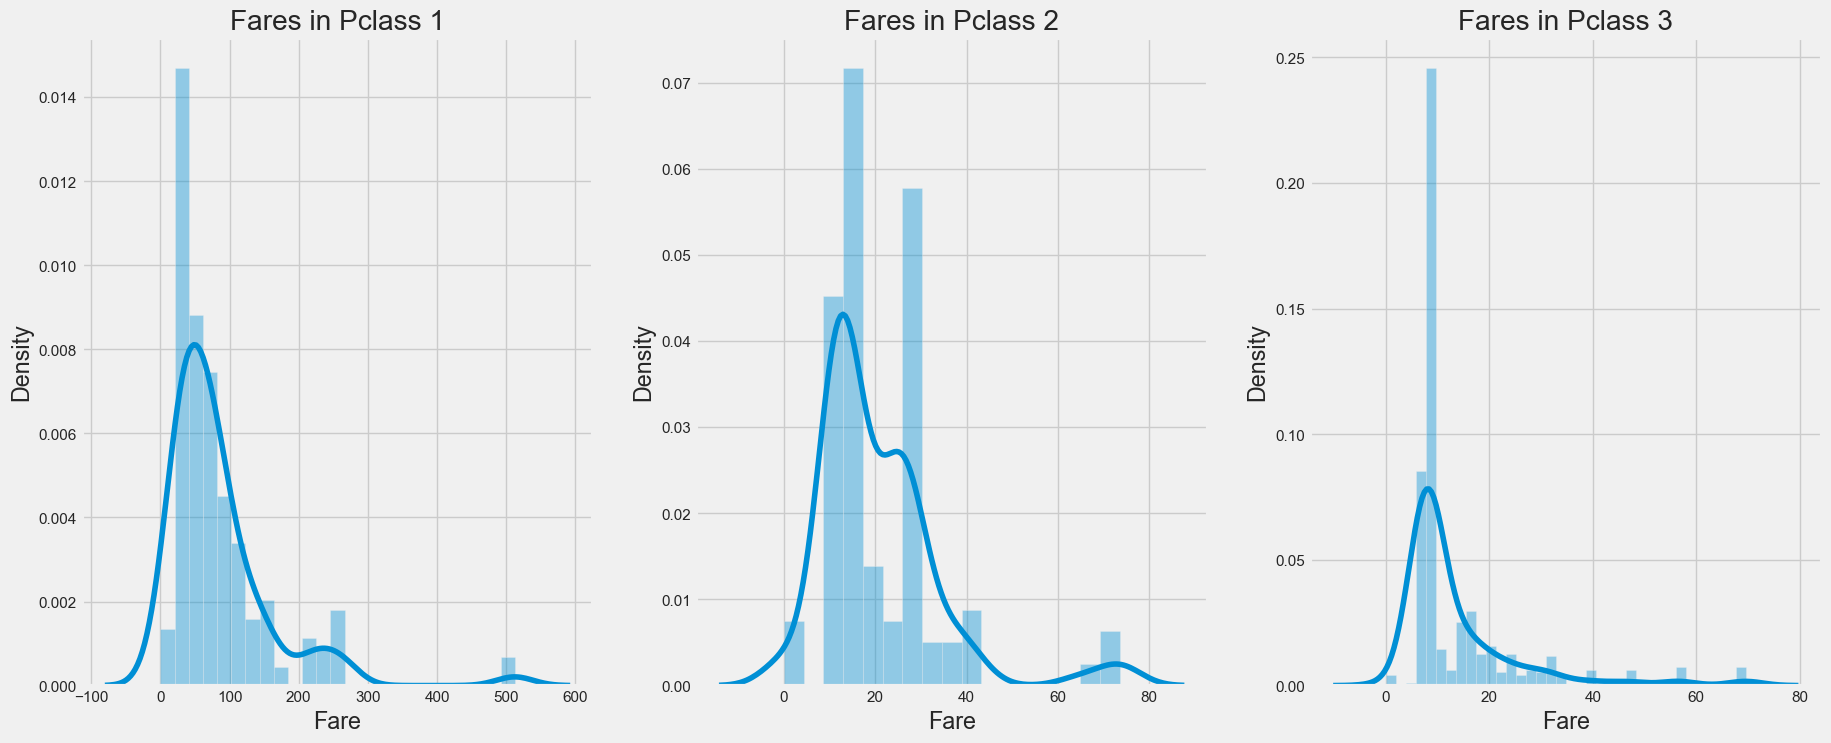

In [217]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(train_df[train_df['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(train_df[train_df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(train_df[train_df['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

<!-- Sex : 남성보다 여성의 생존율이 높다. 이는 구조가 여성이 우선한다
Pclass : Pclass 1의 승객의 생존율이 높다. 반면에 3은 낮다. 여성에게는 Pclass 1이 거의 1등이고, 2등도 높다.
Age : 5~10살의 아이들의 생존율이 높고 15~35살의 성인들이 많이 사망했다.
Embarked : Q의 사람들은 대다수가 Pclass 3. Embarked중에서 C만 생존율이 사망률보다 높다.
Parch + SibSp : 1~2 SibSP, Spouse on board or 1~3 Parents의 생존율이 높다. 혼자오거나 대가족은 상대적으로 낮다. -->

### Sex : 남성보다 여성의 생존율이 높다. 이는 구조가 여성이 우선한다
### Pclass : Pclass 1의 승객의 생존율이 높다. 반면에 3은 낮다. 여성에게는 Pclass 1이 거의 1등이고, 2등도 높다.
### Age : 5 ~ 10살의 아이들의 생존율이 높고 15 ~ 35살의 성인들이 많이 사망했다.
### Embarked : Q의 사람들은 대다수가 Pclass 3. Embarked중에서 C만 생존율이 사망률보다 높다.
### Parch + SibSp : 1 ~ 2 SibSP, Spouse on board or 1 ~ 3 Parents의 생존율이 높다. 혼자오거나 대가족은 상대적으로 낮다.

## 상관계수(Correlation)

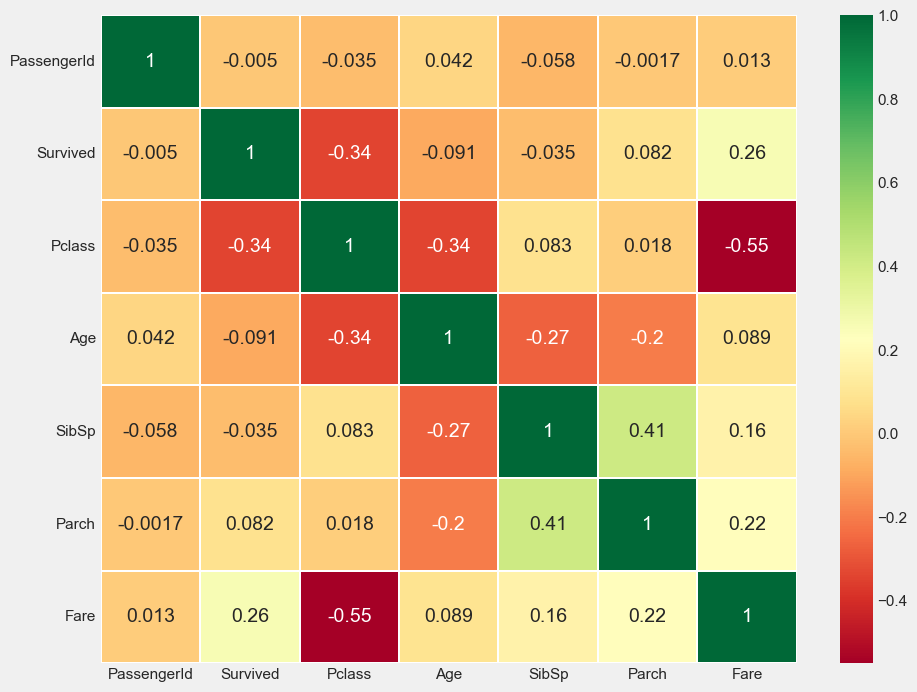

In [218]:
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# annot=True : 각 셀에 숫자를 입력
fig=plt.gcf()
fig.set_size_inches(10, 8)

# 알파벳이나 문자열 사이에 상관관계는 없기 때문에 수치형 변수에만 적용
# 만약 상관계수가 높다면 다중공산성 문제 발생
# 이는 ML 모델을 학습시킬 때 성능 약화

heat맵을 통해 각 변수끼리의 상관계수를 구했다. Pclass와 Fare의 상관계수는 상대적으로 높은 편에 속한다. 주의해서 봐야할 변수라고 생각.

다중공산성 관련 내용 : https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

# 데이터 정제

## Age

Age는 연속형 변수 -> ML모델에 문제가 발생할 가능성 있다.

연속형 변수를 범주형 변수로 변환하자(Binning or 표준화)

나이(0 ~ 80)을 5단위로 binning하자

In [219]:
train_df['Age_band'] = 0
train_df.loc[train_df['Age'] <= 16, 'Age_band'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df.Age <= 32), 'Age_band'] = 1
train_df.loc[(train_df.Age > 32) & (train_df.Age <= 48), 'Age_band'] = 2
train_df.loc[(train_df.Age > 48) & (train_df.Age <= 64), 'Age_band'] = 3
train_df.loc[train_df.Age > 64, 'Age_band'] = 4

In [220]:
train_df.Age_band.value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


loc를 통해 각 나이 범주에 해당하는 Age_band 피쳐를 재생성

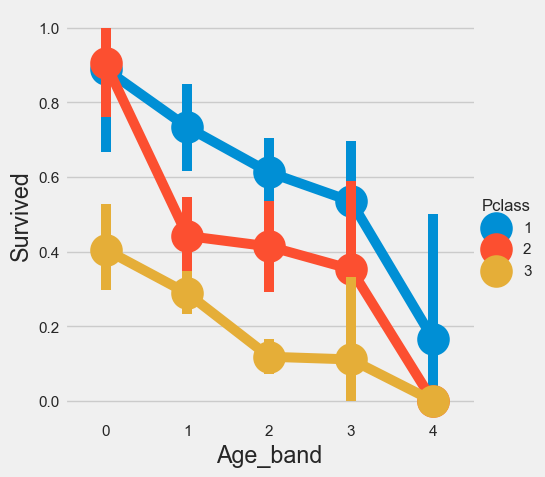

In [221]:
sns.factorplot('Age_band', 'Survived', hue='Pclass', data=train_df)

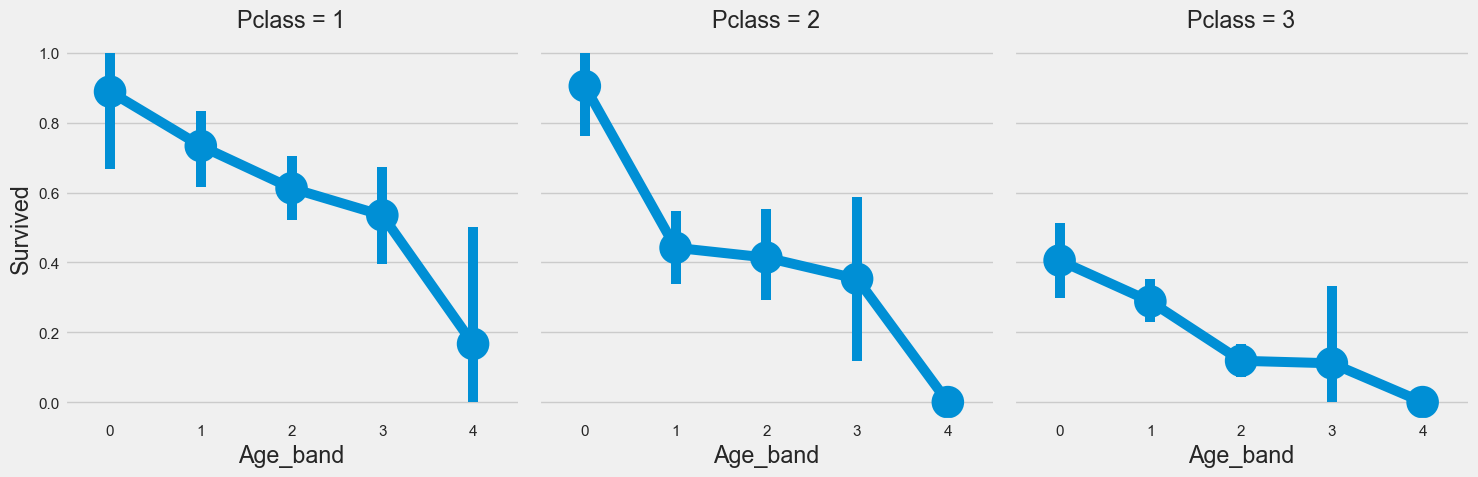

In [222]:
sns.factorplot('Age_band', 'Survived', col='Pclass', data=train_df)

PClass와 무관하게, factorplot로 확인한 결과 확실히 나이가 많아질 수록 생존율이 급감

### Family_Size

SibSp와 Parch 피쳐를 통해 가족의 size를 재생성하고 혼자 유무를 파악하는 피쳐도 만들자.

In [223]:
train_df['Family_Size'] = 0
train_df['Family_Size']=train_df['Parch']+train_df['SibSp']
train_df['Alone'] = 0
train_df.loc[train_df.Family_Size == 0, 'Alone'] = 1

Text(0.5, 0.98, 'Alone vs Survived')

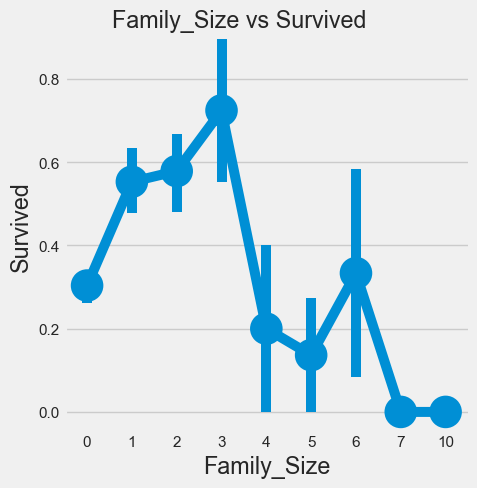

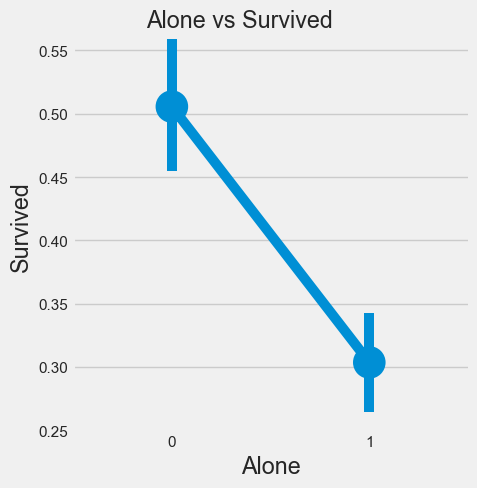

In [224]:
f1 = sns.factorplot('Family_Size', 'Survived', data=train_df)
f1.fig.suptitle('Family_Size vs Survived')

f2 = sns.factorplot('Alone', 'Survived', data=train_df)
f2.fig.suptitle('Alone vs Survived')

위 그래프를 보면 혼자이거나 가족이 4명 이상인 경우 생존율 급락한다. 가족의 크기는 1 ~ 3명일 때가 생존율이 높다.

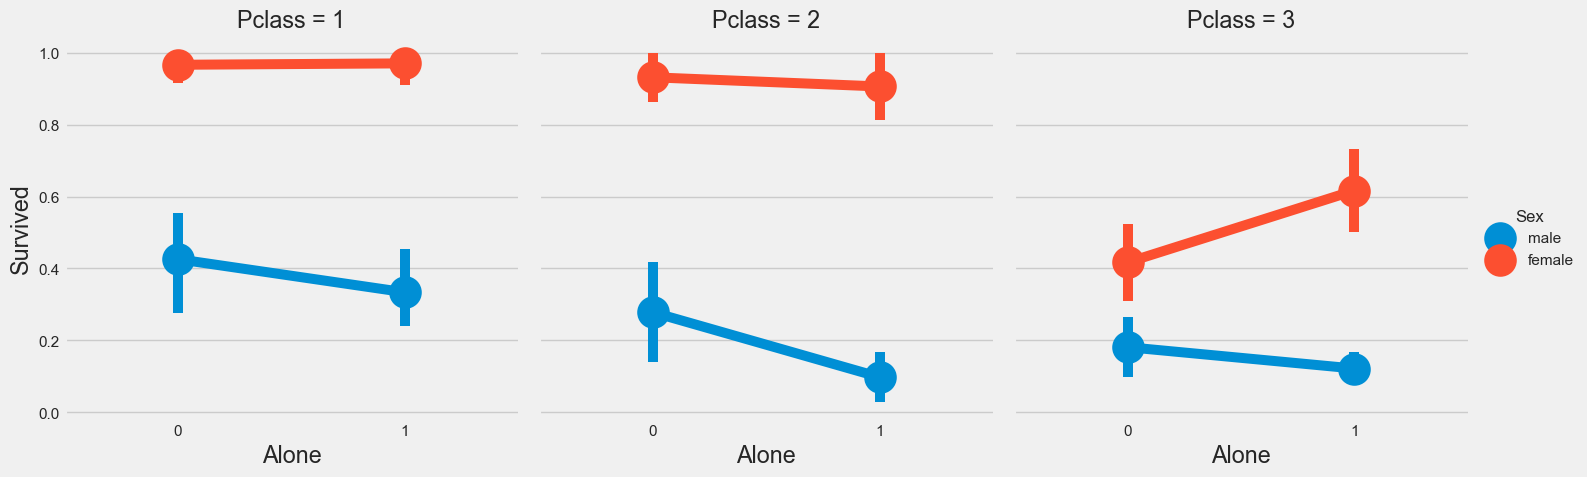

In [225]:
sns.factorplot('Alone', 'Survived', hue='Sex', data=train_df, col='Pclass')

### Fare_Range

Fare 또한 연속형 변수이기 때문에 이산형 변수로 전환해야 한다. pd.qcut 사용. qcut는 설정한 bin에 따라 분리하고 정렬

In [226]:
train_df['Fare_Range'] = pd.qcut(train_df['Fare'], 4)
train_df.groupby('Fare_Range')['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare이 높을수록 생존율도 높아지는 것을 확인

In [227]:
train_df['Fare_cat'] = 0
train_df.loc[train_df.Fare <= 7.91, 'Fare_cat'] = 0
train_df.loc[(train_df.Fare > 7.91) & (train_df.Fare <= 14.454), 'Fare_cat'] = 1
train_df.loc[(train_df.Fare > 14.454) & (train_df.Fare <= 31.0), 'Fare_cat'] = 2
train_df.loc[(train_df.Fare > 31.0) & (train_df.Fare < 513), 'Fare_cat'] = 3

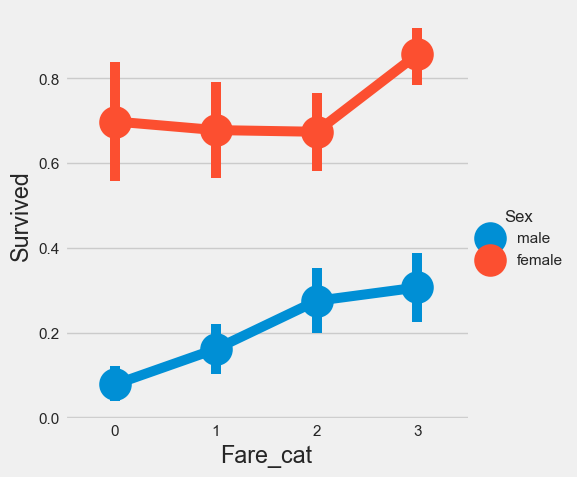

In [228]:
sns.factorplot('Fare_cat', 'Survived', hue='Sex', data=train_df)

Fare은 Pcalss와 상관관계가 있을 것이고, PClass가 높을 수록 생존율이 높았었는데 Fare도 마찬가진 것을 보니 생각이 맞을 듯 싶다.

## 인코딩

In [229]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_df.Sex)
train_df['Sex'] = le.transform(train_df['Sex'])

le.fit(train_df.Embarked)
train_df.Embarked = le.transform(train_df.Embarked)

le.fit(train_df.Initial)
train_df.Initial = le.transform(train_df.Initial)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,2,0,1,"(7.91, 14.454]",1


ML 알고리즘을 학습시길 경우에 테스트 데이터에 문자열이 들어있으면 학습율이 떨어지므로 인코딩 작업을 실시

Sex, Embarked, Initial은 카테고리컬 함수이므로 LabelEncoder을 실행해 주었다.

그러나 회귀에서는 OneHot이 성능이 좋으므로 나중에 한번 OneHot Encoder도 실행해봐야 겠다.

이번엔 필요없는 Feature을 drop 시켜보자.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Survived'),
  Text(0, 1.5, 'Pclass'),
  Text(0, 2.5, 'Sex'),
  Text(0, 3.5, 'SibSp'),
  Text(0, 4.5, 'Parch'),
  Text(0, 5.5, 'Embarked'),
  Text(0, 6.5, 'Initial'),
  Text(0, 7.5, 'Age_band'),
  Text(0, 8.5, 'Family_Size'),
  Text(0, 9.5, 'Alone'),
  Text(0, 10.5, 'Fare_cat')])

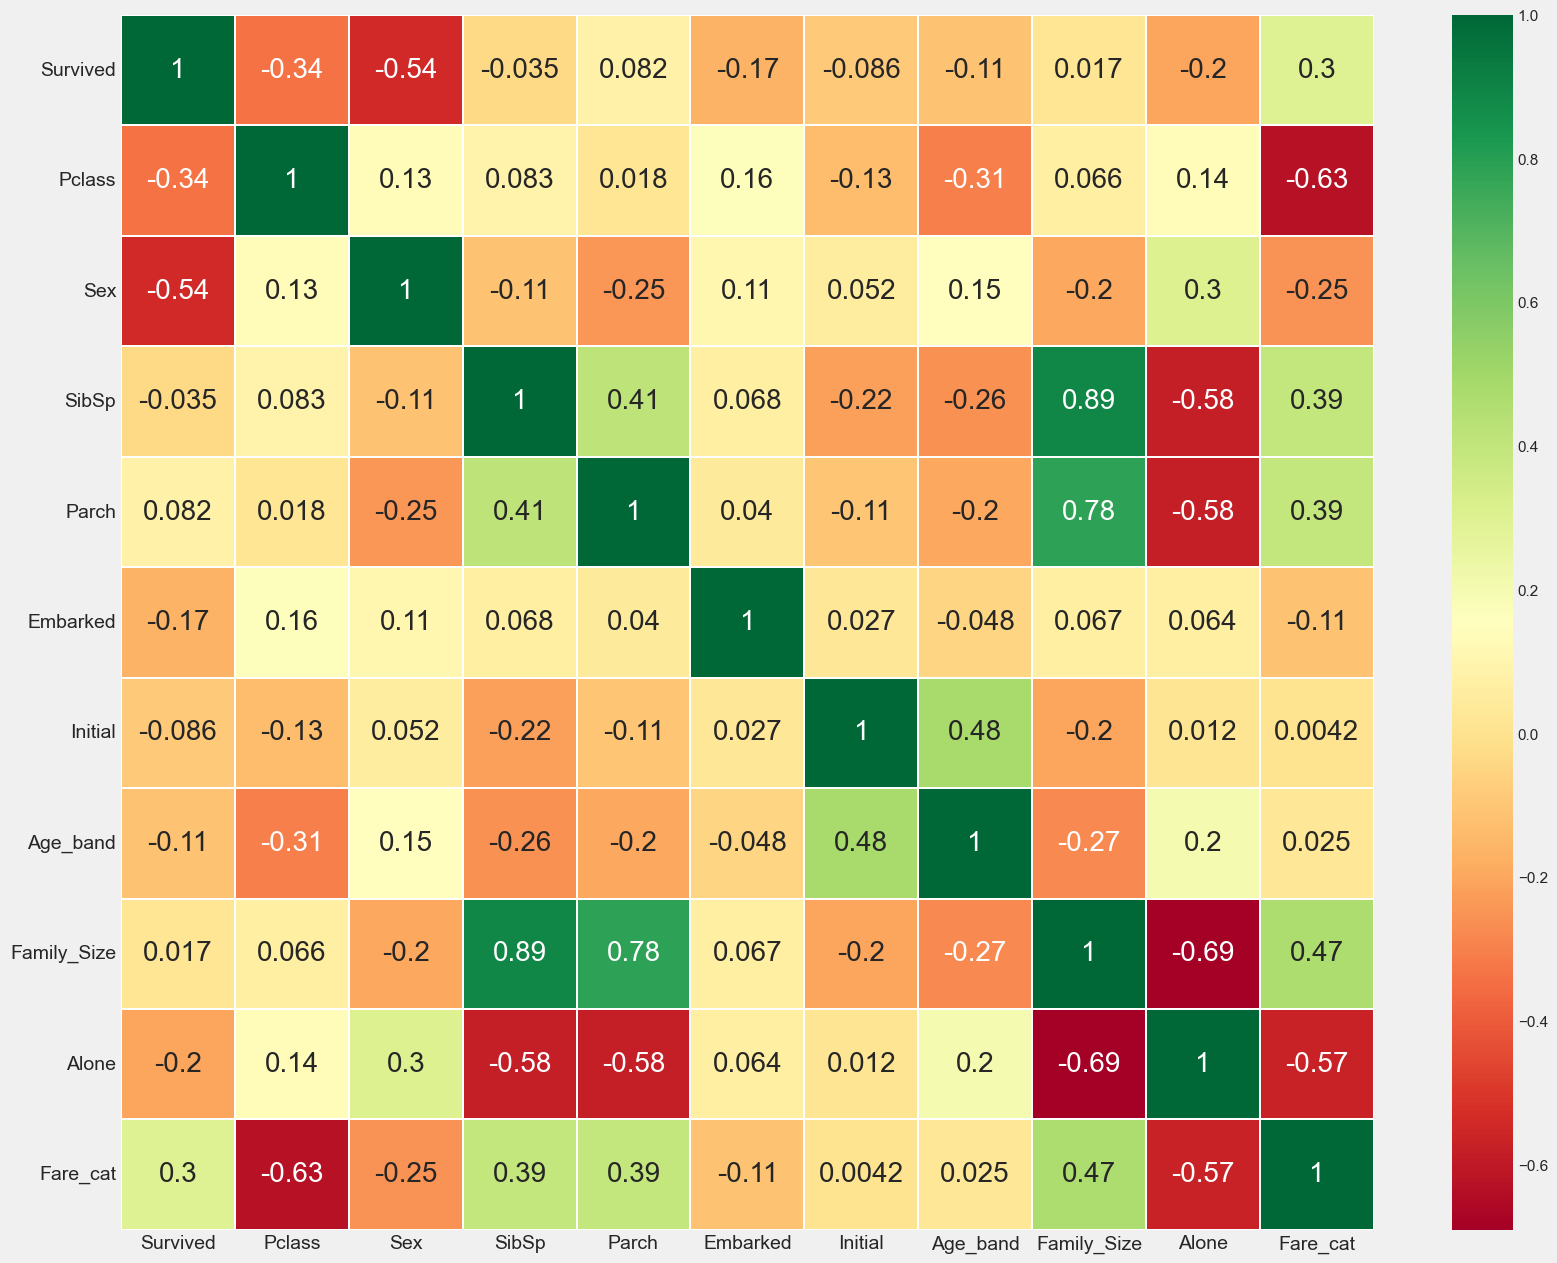

In [230]:
# Name : 딱 봐도 노필요
# Age : Age_band가 있다.
# Ticket : 딱봐도 노필요
# Fare : Fare_cat 있다
# Cabin : 객실번호가 왜 필요하겠나
# Fare_Range ; Fare_cat 있다.
# PassengerId : index가 있는데 왜 필요?

train_df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], inplace=True, axis=1)

sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':20})

#annot_kws : 글자 크기 조절 가능, fmt="f" : 데이터 표시 데이터타입

fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

필요없는 변수들을 지우고 상관관계를 확인해본 결과,

Family Size는 SibSp, Parch를 통해 만든 요약변수(파생변수보단 요약에 가깝다고 생각)다 보니 상관관계가 높다.

Fare_Cat도 PClass와 상관관가 높은 편에 속한다.

Alone 또한 Family_Size를 통한 요약변수라 관계성이 짙은 편이다.

상관관계가 높은 변수는 다중공산성을 조심해야 한다.

# 예측 시작

아래 내용 및 개념에 대해서는 아직 더 이해가 필요하다고 생각.

In [231]:
from sklearn.linear_model import LogisticRegression     # 로지스틱 회귀
from sklearn import svm                                 # 서포트 벡터 머신
from sklearn.ensemble import RandomForestClassifier     # 랜덤포레스트
from sklearn.neighbors import KNeighborsClassifier      # KNeighbor 분류
from sklearn.naive_bayes import GaussianNB              # 가우시안 나이브
from sklearn.tree import DecisionTreeClassifier         # 의사결정 나무
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

이번 데이터 예측을 위한 모듈들을 import 해준다.

In [232]:
train,test=train_test_split(train_df,test_size=0.3,random_state=0,stratify=train_df['Survived'])
train_X=train[train.columns[1:]]	# 설명변수들
train_Y=train[train.columns[:1]]  # Survived(목표 변수)
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train_df[train_df.columns[1:]]
Y=train_df['Survived']

stratify : Stratified K Fold 역할과 비슷. Stratify를 Target 변수로 지정해주면 비율에 맞게 나눠준다

타이타닉 데이터를 train, test 데이터로 분류해준다.

### Radial Support Vector Machines


In [233]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


선형 SVM에선 사용할 수 없는 상황에서 사용하는 커널

2차원 상에서 선형으로 분류할 수 없던 데이터들이 고차원으로 확장하자 가능해졌다. 이렇게 커널은 주어진 데이터를 보다 고차원으로 확장시켜 준다.

커널의 종류는 다양하다.

> Polynomal

> Sigmoid

> 가우시안 rbf

이 중에 가우시안 rbf의 성능이 뛰어나다. rbf의 하이퍼 파라미터는 gamma, C가 있다.

gamma : gamma가 클수록 데이터 포인터들이 영향력을 행사하는 거리가 짧아진다. 즉, gamma가 커지면 작은 표준편차를 갖는다.

C : C가 커질수록 이상치의 존재를 무시하기가 힘들어진다.

이 두 파라미터가 낮으면 underfitting, 높으면 overfitting의 위험이 있다.

### Linear Support Vector Machines

In [234]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
pred2 = model.predict(test_X)
print('Accuracy for linear SVC is ', metrics.accuracy_score(pred2, test_Y))

Accuracy for linear SVC is  0.7910447761194029


### LogisticRegression

In [235]:
model = LogisticRegression()
model.fit(train_X, train_Y)
pred3 = model.predict(test_X)
print('Accuracy of the Logistic Regression is ', metrics.accuracy_score(pred3, test_Y))

Accuracy of the Logistic Regression is  0.8022388059701493


### DecisionTreeClassifier

In [146]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
pred4 = model.predict(test_X)
print("Accuracy of the DecisionTreeClassifier is ", metrics.accuracy_score(pred4, test_Y))

Accuracy of the DecisionTreeClassifier is  0.8097014925373134


In [147]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(train_X, train_Y)
print('Score: {}'.format(tree_clf.score(train_X, train_Y)))

Score: 0.8330658105939005


### KNeighborClassifier

In [236]:
mdoel = KNeighborsClassifier()
model.fit(train_X, train_Y)
pred5 = model.predict(test_X)
print('Accuracy of the KNeighborClassifier is ', metrics.accuracy_score(pred5, test_Y))

Accuracy of the KNeighborClassifier is  0.8022388059701493


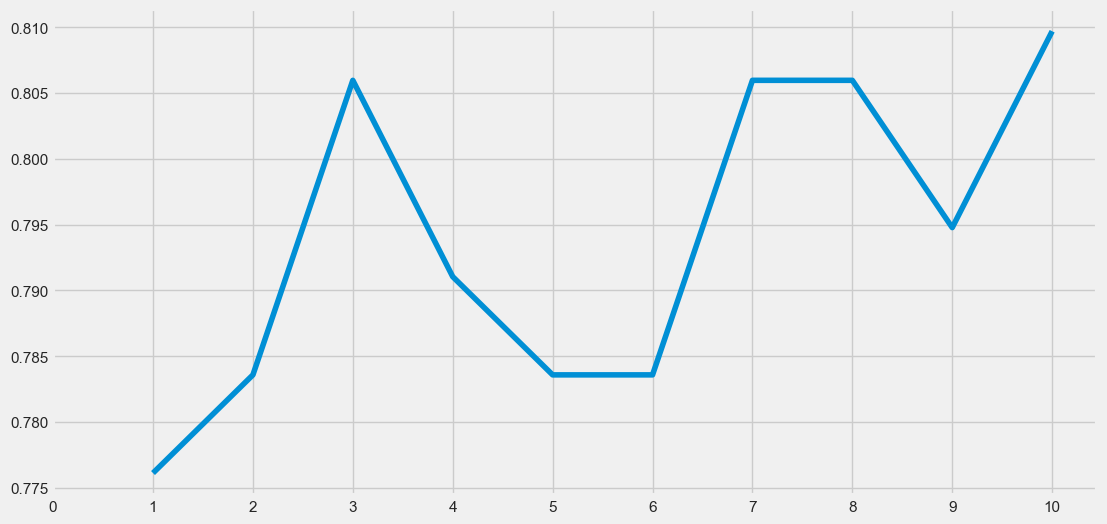

In [237]:
a_index = list(range(1, 11))
a = pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1, 11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    pred = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(pred, test_Y)))
    # Series의 append는 Series로 받는다.
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12, 6)

In [238]:
print('Accuracies for different values of n are : ', a.values, 'with the max values as ' , a.values.max())

Accuracies for different values of n are :  [0.7761194  0.78358209 0.80597015 0.79104478 0.78358209 0.78358209
 0.80597015 0.80597015 0.79477612 0.80970149] with the max values as  0.8097014925373134


### GauissianNB

In [239]:
model=GaussianNB()
model.fit(train_X, train_Y)
pred6 = model.predict(test_X)
print('Accuract of the NaiveBayes is ', metrics.accuracy_score(pred6, test_Y))

Accuract of the NaiveBayes is  0.7985074626865671


### RandomForestClassifier

In [240]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
pred7 = model.predict(test_X)
print('Accuracy of the Random Forests is ', metrics.accuracy_score(pred7, test_Y))

Accuracy of the Random Forests is  0.8134328358208955


모델의 정확성이 분류의 성능을 꼭 결정하는 것은 아니다. 정확도가 90% 넘는다고 다른 테스트 또는 학습용 데이터를 학습시켜서 90%의 정확성이 나온다고 보장할 수 없다. 높아질 수도 떨어질 수도 있다. 이것을 model variance라고 한다. 이를 극복하기 위해 교차검증을 한다.

그래도 일단 성능을 좋게 만들기 위해 교차검증도 해보자.

### Cross Validation

In [241]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, shuffle=True, random_state=22)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression','KNN','Decision Tree','Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(),
         GaussianNB(),RandomForestClassifier(n_estimators=100)]
         
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.790225,0.056315
Radial Svm,0.828377,0.055070
Logistic Regression,0.793583,0.048729
KNN,0.798077,0.053113
Decision Tree,0.805868,0.044795
Naive Bayes,0.785730,0.060324
Random Forest,0.812609,0.042738


model별 cross validation을 해본 결과

<AxesSubplot:>

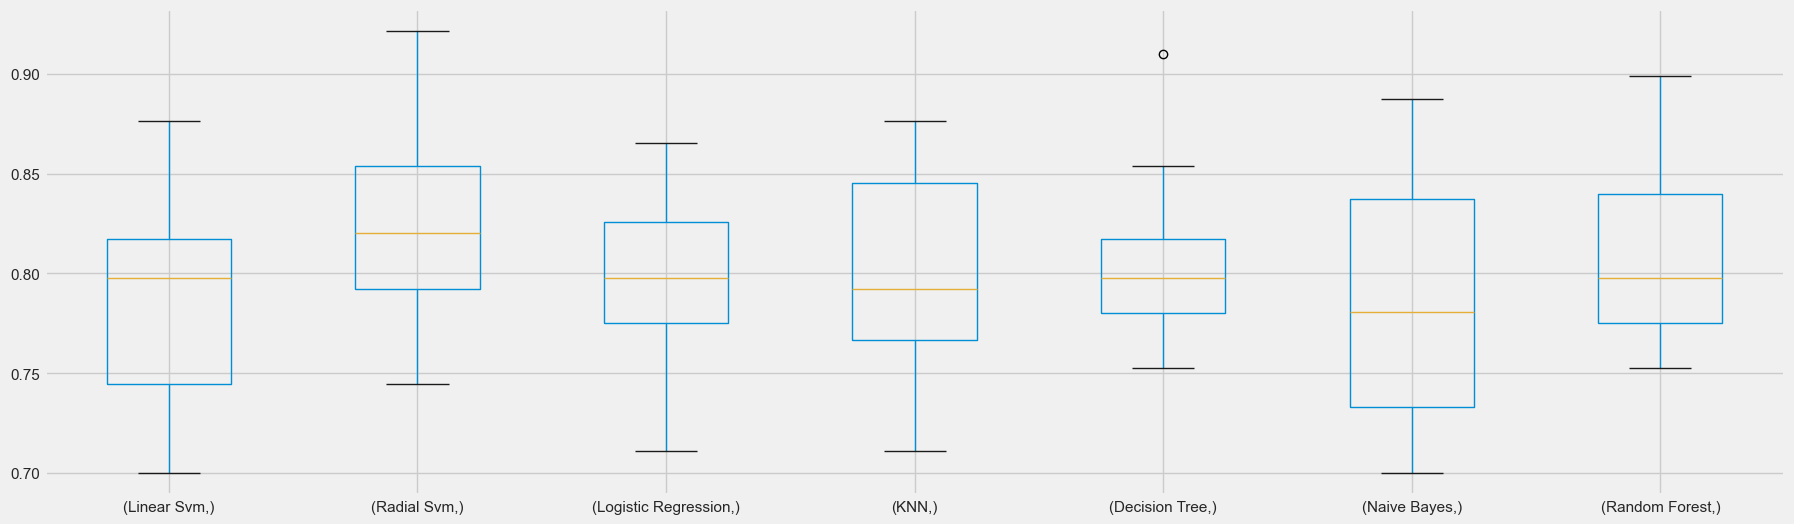

In [154]:
plt.subplots(figsize=(20, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot() # df.T는 transpose(col과 row를 서로 바꿔준다.)

In [155]:
box

,0,1,2,3,4,5,6,7,8,9
Linear Svm,0.700000,0.797753,0.752809,0.808989,0.730337,0.797753,0.876404,0.741573,0.820225,0.876404
Radial Svm,0.744444,0.764045,0.808989,0.853933,0.786517,0.808989,0.910112,0.831461,0.853933,0.921348
Logistic Regression,0.711111,0.808989,0.808989,0.786517,0.719101,0.775281,0.831461,0.775281,0.853933,0.865169
KNN,0.711111,0.786517,0.797753,0.820225,0.764045,0.775281,0.865169,0.853933,0.730337,0.876404
Decision Tree,0.777778,0.820225,0.752809,0.808989,0.808989,0.786517,0.853933,0.786517,0.764045,0.910112
Naive Bayes,0.700000,0.775281,0.719101,0.786517,0.730337,0.741573,0.842697,0.820225,0.853933,0.887640
Random Forest,0.766667,0.842697,0.752809,0.797753,0.775281,0.797753,0.887640,0.831461,0.775281,0.898876


In [156]:
box.T

,Linear Svm,Radial Svm,Logistic Regression,KNN,Decision Tree,Naive Bayes,Random Forest
0,0.700000,0.744444,0.711111,0.711111,0.777778,0.700000,0.766667
1,0.797753,0.764045,0.808989,0.786517,0.820225,0.775281,0.842697
2,0.752809,0.808989,0.808989,0.797753,0.752809,0.719101,0.752809
3,0.808989,0.853933,0.786517,0.820225,0.808989,0.786517,0.797753
4,0.730337,0.786517,0.719101,0.764045,0.808989,0.730337,0.775281
5,0.797753,0.808989,0.775281,0.775281,0.786517,0.741573,0.797753
6,0.876404,0.910112,0.831461,0.865169,0.853933,0.842697,0.887640
7,0.741573,0.831461,0.775281,0.853933,0.786517,0.820225,0.831461
8,0.820225,0.853933,0.853933,0.730337,0.764045,0.853933,0.775281
9,0.876404,0.921348,0.865169,0.876404,0.910112,0.887640,0.898876


boxplot을 나타내기 위해 box 데이터프레임을 transpose 해주었다.

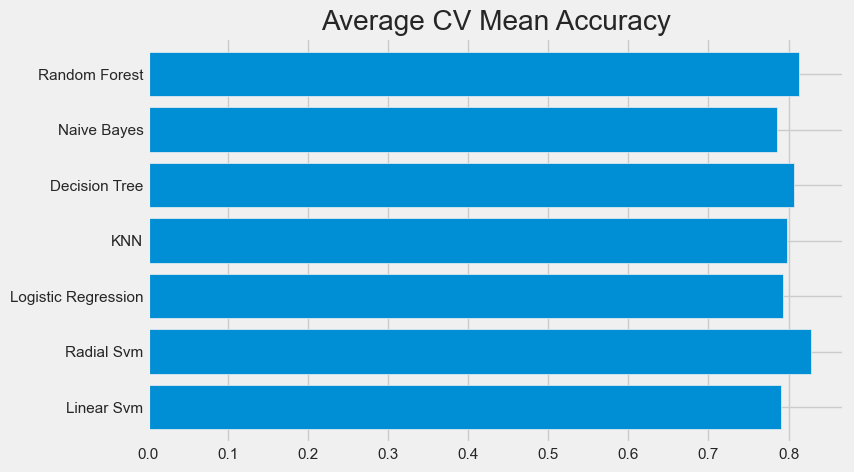

In [157]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)

모든 예측 모델 중 Radial SVM이 가장 성능이 좋은것으로 나타났다.

### Confusion Metrix

Confunion Metrix가 뭔지 몰랐는데 찾아보니 ADsP에서 공부했던 내용중 성과분석이었다. 정분류율, 특이도, 민감도 등등을 포함한 성과분석이다.



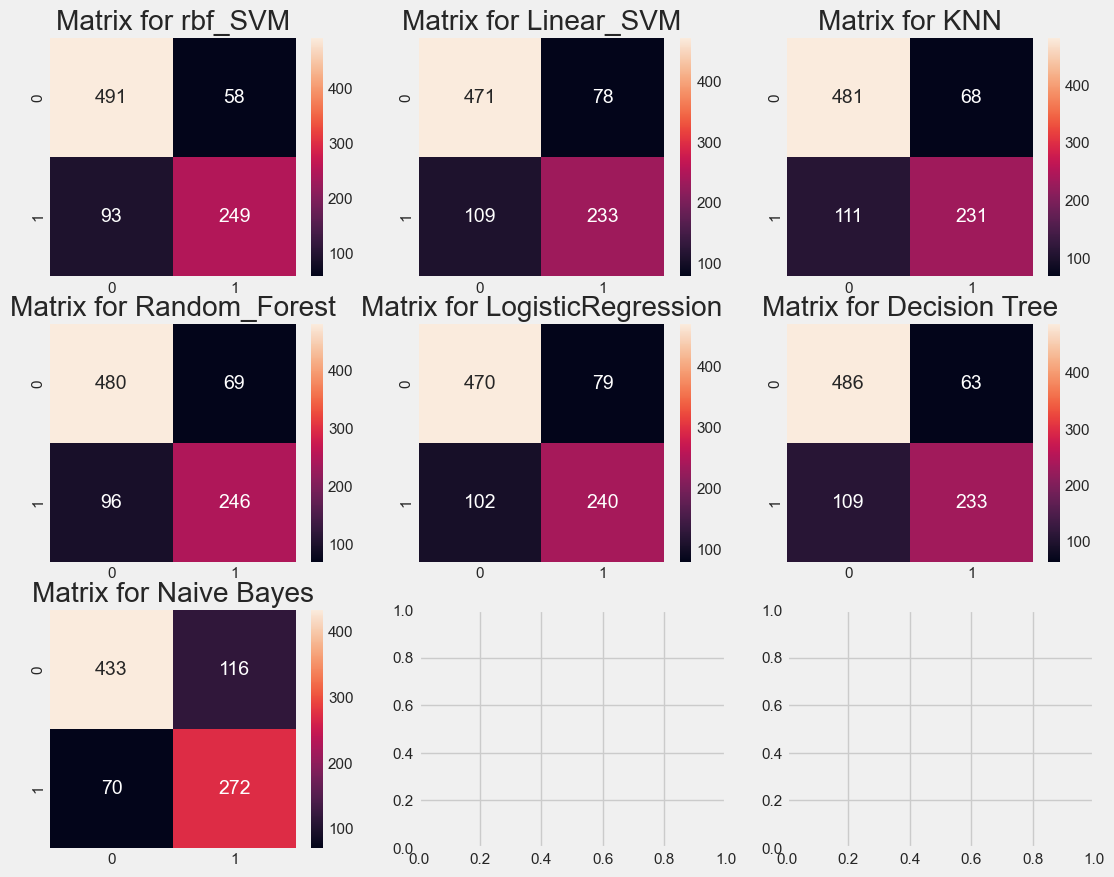

In [242]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf_SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear_SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title("Matrix for Random_Forest")
y_pred = cross_val_predict(LogisticRegression(), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for LogisticRegression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2) # subplots 사이에 예약된 공간

rbf_SVM에서 옳은 예측은 491 + 247 -> accuracy = (491+247)/891

error은 58 + 95, 문제점은 생존자를 사망자로 예측한 것이 더 많다.

rbf_SVM은 사망자를 정확하게 예측할 확률이 높고, 네이비안은 생존자를 정확하게 예측할 확률이 높다.

### Hyper Parameters 튜닝

머신러닝에서 사용자가 직접 튜닝함으로서 모델의 성능을 조절할 수 있다.

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
# verbose : iteration시마다 수행결과 메시지 출력 여부
# 0 : 메시지 출력 ㄴ(default)
# 1 : 간단한 메세지 출력
# 2 : 하이퍼 파라미터별 메시지 출력
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

SVC 머신러닝 모델의 하이퍼 파라미터는 대표적으로 C, gamma, kernel이 있다. 이를 딕셔너리 자료구조로 만들어 놓고 GridSearchCV로 돌린 코드이다

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

이 코드는 RandomForestClassifier의 하이퍼 파라미터 중 n_estimators로 성능 조절을 했다.

## Ensambling

### Voting

Voting Classifier은 여러 다른 ML 모델의 예측을 결합한 가장 간단한 방법이다.

Voting은 여러 모형에서 산출된 결과를 다수결에 의해 최종 결과를 선정하는 과정이다

In [243]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                             ('RBF', svm.SVC(probability=True, kernel='rbf',C=0.5, gamma=0.1)),
                                             ('RFor',RandomForestClassifier(n_estimators=500, random_state=0)),
                                             ('LR', LogisticRegression(C=0.05)),
                                             ('DT',DecisionTreeClassifier(random_state=0)),
                                             ('NB',GaussianNB()),
                                             ('svm',svm.SVC(kernel='linear', probability=True))],
                                  voting='soft').fit(train_X,train_Y)
print('Accuracy for ensembled model is : ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is' , cross.mean())

Accuracy for ensembled model is :  0.8283582089552238
The cross validated score is 0.8260424469413232


Voting을 통해 KNN, RBF, RFor, LR, DT, NB, SVM의 모델을 결합한 분류 예측을 시도했다.



### Bagging

Bagging은 분산이 높은 모델에서 잘 작동되는 모델이라 한다.
배깅은 주어진 자료에서 여러개의 붓스트랩 자료를 생성하고 각 붓스트랩 자료에서 예측모형을 만든 후 결합하여 최종 예측 모델을 만든다.

In [244]:
# Bagging KNN
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
pred = model.predict(test_X)
print('Accuracy for bagged KNN is ', metrics.accuracy_score(pred, test_Y))
result = cross_val_score(model, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is ', result.mean())

Accuracy for bagged KNN is  0.8022388059701493
The cross validated score for bagged KNN is  0.8104119850187266


In [245]:
# Bagging DecisionTreeClassifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
pred = model.predict(test_X)
print('Accuracy for bagged Decision Tree is ', metrics.accuracy_score(pred, test_Y))
result = cross_val_score(model, X,Y,cv=10, scoring='accuracy')
print('The Cross validated score for bagged Decision Tree is ', result.mean())

Accuracy for bagged Decision Tree is  0.8171641791044776
The Cross validated score for bagged Decision Tree is  0.8171410736579275


### Boosting

Boosting하면 가장 먼저 생각나는 것은 XGBoost인데, 이 외에도 여러가지가 있었다. AdaBoost, GridientBoost가 있지만 XGBoost가 가장 좋은 모델이라고 한다.



In [163]:
# Adaboost (Decision Tree)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The Cross validated score for Adaboost is ', result.mean())

The Cross validated score for Adaboost is  0.8271660424469414


In [164]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The Cross validated score is ', result.mean())

The Cross validated score is  0.817116104868914


In [166]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The Cross validated score is ', result.mean())

The Cross validated score is  0.8205118601747815


Text(0.5, 1.0, 'Feature Importance in XgBoost')

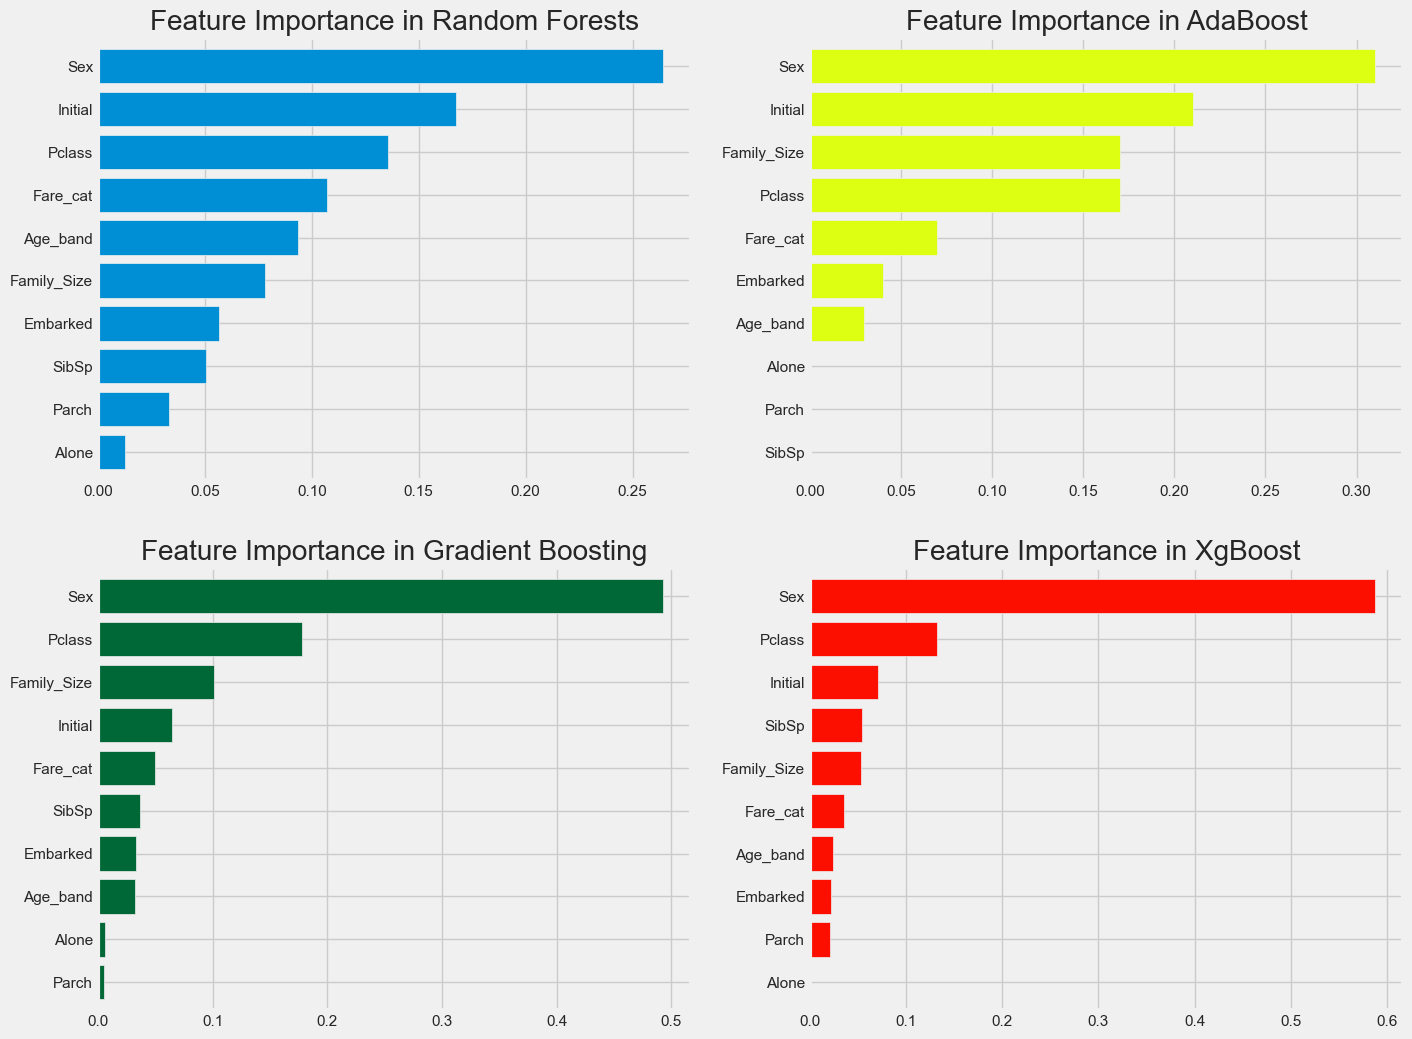

In [167]:
f,ax = plt.subplots(2, 2, figsize=(15, 12))
model=RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')